('McLaren', '720S', 2021, '4', 710, 568, '02.Jul', '298')
('Ford', 'Mustang Shelby GT500', 2022, '05.Feb', 760, 625, '03.May', '81')
('Bugatti', 'Chiron', 2021, '8', 1500, 1180, '02.Apr', '3,000,000')
('Dodge', 'Challenger SRT Hellcat', 2022, '06.Feb', 717, 656, '03.May', '61')
('Koenigsegg', 'Jesko', 2021, '5', 1280, 1015, '02.May', '2,800,000')
('Pagani', 'Huayra', 2021, '6', 720, 737, '02.Aug', '2,800,000')
('Rimac', 'Nevera', 2022, 'Electric', 1914, 1696, 'Jan.85', '2,400,000')
('Lamborghini', 'Aventador SVJ', 2021, '06.May', 759, 531, '02.Aug', '517,77')
('Ferrari', 'SF90 Stradale', 2021, '4', 986, 590, '02.May', '625')
('Lamborghini', 'Aventador SVJ', 2021, '06.May', 759, 531, '02.Aug', '518')
('Ferrari', 'SF90 Stradale', 2021, '4', 986, 590, '02.May', '625')
('Dodge', 'Challenger SRT Hellcat Redeye', 2022, '06.Feb', 797, 707, '03.Apr', '78,595')
('Lamborghini', 'Aventador', 2021, '06.May', 770, 531, '02.Sep', '417,826')
('Ferrari', 'F8 Tributo', 2021, '03.Sep', 710, 568, '02.Aug

შეიყვანეთ მანქანის მარკა:  bmw
შეიყვანეთ მანქანის მოდელი:  e39
შეიყვანეთ მანქანის გამოშვების წელი:  2000
შეიყვანეთ ძრავის ზომა ლიტრებში:  4
შეიყვანეთ ცხენის ძალა:  566
შეიყვანეთ ბრუნვა:  455
შეიყვანეთ 0-60MPH დრო:  4
შეიყვანეთ ფასი (USD):  15000
შეიყვანეთ იმ მანქანის მოდელი, რომლის ფასის შეცვლაც გსურთ:  Ferrari
შეიყვანეთ ახალი ფასი(USD):  20000000
შეიყვანეთ იმ მანქანის მოდელი, რომლის წაშლა გსურთ:  Pagani


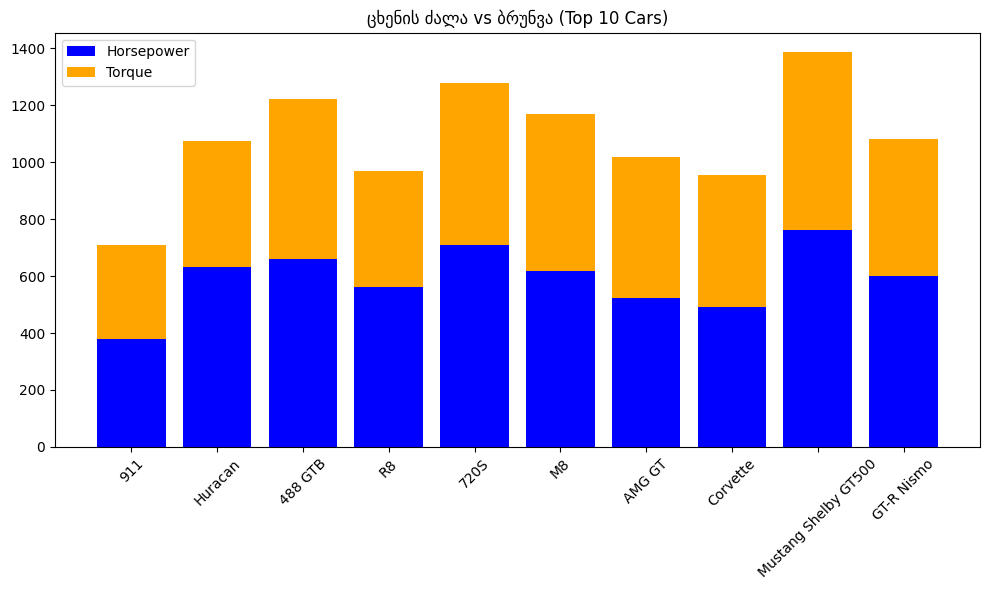

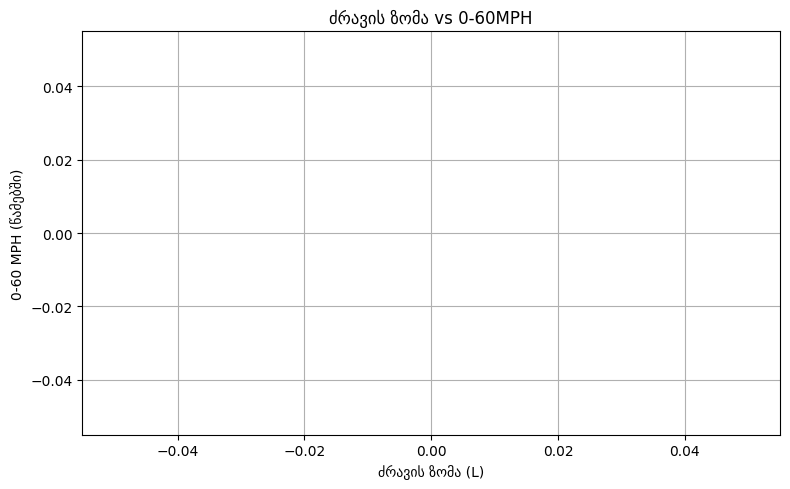

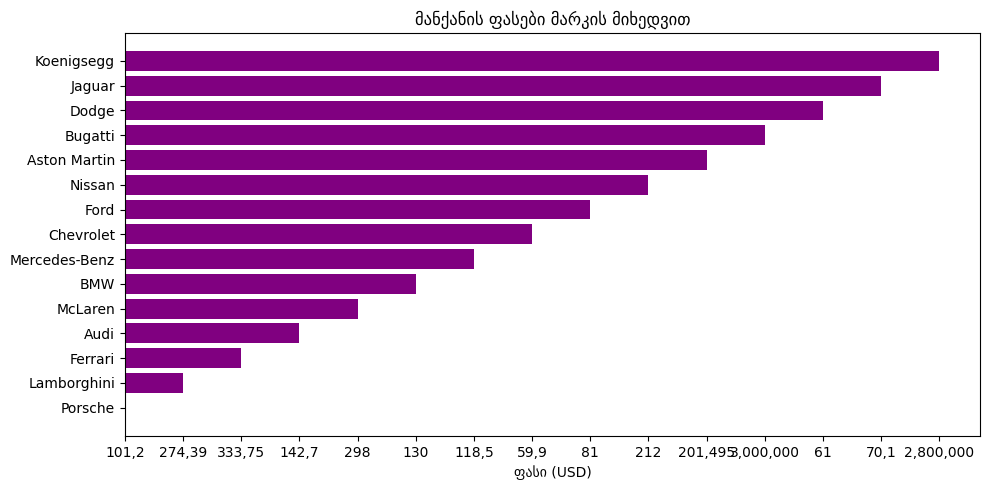

In [4]:
import sqlite3
conn = sqlite3.connect('scar.sqlite3')
c = conn.cursor()

#მოგვაქვს ყველა მანქანა ბაზიდან ცხენის ძალის მიხედვით
c.execute("SELECT * FROM scarprice WHERE Horsepower > 700")
result = c.fetchall()

#შედეგების დაბეჭდვა
for row in result:
    print(row)

# momxmarebels shemoakvs informacia
make = input("შეიყვანეთ მანქანის მარკა: ")
model = input("შეიყვანეთ მანქანის მოდელი: ")
year = int(input("შეიყვანეთ მანქანის გამოშვების წელი: "))
engine = float(input("შეიყვანეთ ძრავის ზომა ლიტრებში: "))
hp = int(input("შეიყვანეთ ცხენის ძალა: "))
torque = int(input("შეიყვანეთ ბრუნვა: "))
ztos = float(input("შეიყვანეთ 0-60MPH დრო: "))
price = float(input("შეიყვანეთ ფასი (USD): "))

# ჩანაწერის დამატება ბაზაში
c.execute("""
    INSERT INTO scarprice
    ("Car Make", "Car Model", "Year", "Engine Size (L)", "Horsepower", "Torque (lb-ft)", "0-60 MPH Time (seconds)", "Price (in USD)")
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
""", (make, model, year, engine, hp, torque, ztos, price))


conn.commit()

# განახლებული მანქაის მოდელის შეყვანა
modelUpdate = input("შეიყვანეთ იმ მანქანის მოდელი, რომლის ფასის შეცვლაც გსურთ: ")
newPrice = float(input("შეიყვანეთ ახალი ფასი(USD): "))

c.execute("""
    UPDATE scarprice 
    SET "Price (in USD)" = ? 
    WHERE "Car Model" = ?
""", (newPrice, modelUpdate))
conn.commit()

# წასაშლელი მანქანის მოდელის შეყვანა
modelDelete = input("შეიყვანეთ იმ მანქანის მოდელი, რომლის წაშლა გსურთ: ")

c.execute('DELETE FROM scarprice WHERE "Car Model" = ?', (modelDelete,))
conn.commit()



import matplotlib.pyplot as plt

#პირველი დიაგრამა,ცხენისძალა და ბრუნვა.
def PlotHorsepowerVsTorque():
    c.execute('SELECT "Car Model", "Horsepower", "Torque (lb-ft)" FROM scarprice WHERE "Horsepower" IS NOT NULL AND "Torque (lb-ft)" IS NOT NULL LIMIT 10')
    data = c.fetchall()

    Models = [row[0] for row in data]
    Horsepower = [row[1] for row in data]
    Torque = [row[2] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(Models, Horsepower, color='blue', label='Horsepower')
    plt.bar(Models, Torque, bottom=Horsepower, color='orange', label='Torque')
    plt.xticks(rotation=45)
    plt.title("ცხენის ძალა vs ბრუნვა (Top 10 Cars)")
    plt.legend()
    plt.tight_layout()
    plt.show()

#მეორე დიაგრამა,ძრავისა და აჩქარების კავშირი
def PlotEngineVsAcceleration():
    c.execute('SELECT "Engine Size (L)", "0-60 MPH Time" FROM scarprice WHERE "Engine Size (L)" IS NOT NULL AND "0-60 MPH Time" IS NOT NULL LIMIT 100')
    data = c.fetchall()

    EngineSizes = []
    ZeroTo60 = []

    for row in data:
        try:
            Eng = float(row[0])
            Ztos = float(row[1])
            EngineSizes.append(Eng)
            ZeroTo60.append(Ztos)
        except (ValueError, TypeError):
            continue

    plt.figure(figsize=(8, 5))
    plt.scatter(EngineSizes, ZeroTo60, c='green')
    plt.title("ძრავის ზომა vs 0-60MPH")
    plt.xlabel("ძრავის ზომა (L)")
    plt.ylabel("0-60 MPH (წამებში)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#მესამე დიაგრამა,ფასი და მარკა.
def PlotPriceByMake():
    c.execute('SELECT "Car Make", "Price (in USD)" FROM scarprice WHERE "Price (in USD)" IS NOT NULL LIMIT 15')
    data = c.fetchall()

    Makes = [row[0] for row in data]
    Prices = [row[1] for row in data]

    plt.figure(figsize=(10, 5))
    plt.barh(Makes, Prices, color='purple')
    plt.title("მანქანის ფასები მარკის მიხედვით")
    plt.xlabel("ფასი (USD)")
    plt.tight_layout()
    plt.show()

PlotHorsepowerVsTorque()
PlotEngineVsAcceleration()
PlotPriceByMake()

conn.close()

